# Protein Structure Prediction Using TCN



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Important library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/psp/2018-06-06-ss.cleaned.csv")

df.tail()

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
393727,4UWE,D,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCBTTCEEEEEEEEEETTEEEEEEEECCCSSCCB...,CCCCCCCCCCCCCCECCCEEEEEEEEEECCEEEEEEEECCCCCCCE...,5037,True
393728,5J8V,A,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCCSSSCCEEEECSEETTEECCEECCEEETTEEE...,CCCCCCCCCCCCCCCCCCCCEEEECCEECCEECCEECCEEECCEEE...,5037,False
393729,5J8V,B,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCCSSSCCEEEECSEETTEECCEECCEEETTEEE...,CCCCCCCCCCCCCCCCCCCCEEEECCEECCEECCEECCEEECCEEE...,5037,False
393730,5J8V,C,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCCSSSCCEEEECSEETTEECCEECCEEETTEEE...,CCCCCCCCCCCCCCCCCCCCEEEECCEECCEECCEECCEEECCEEE...,5037,False
393731,5J8V,D,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCCSSSCCEEEECSEETTEECCEECCEEETTEEE...,CCCCCCCCCCCCCCCCCCCCEEEECCEECCEECCEECCEEECCEEE...,5037,False


# Visualization

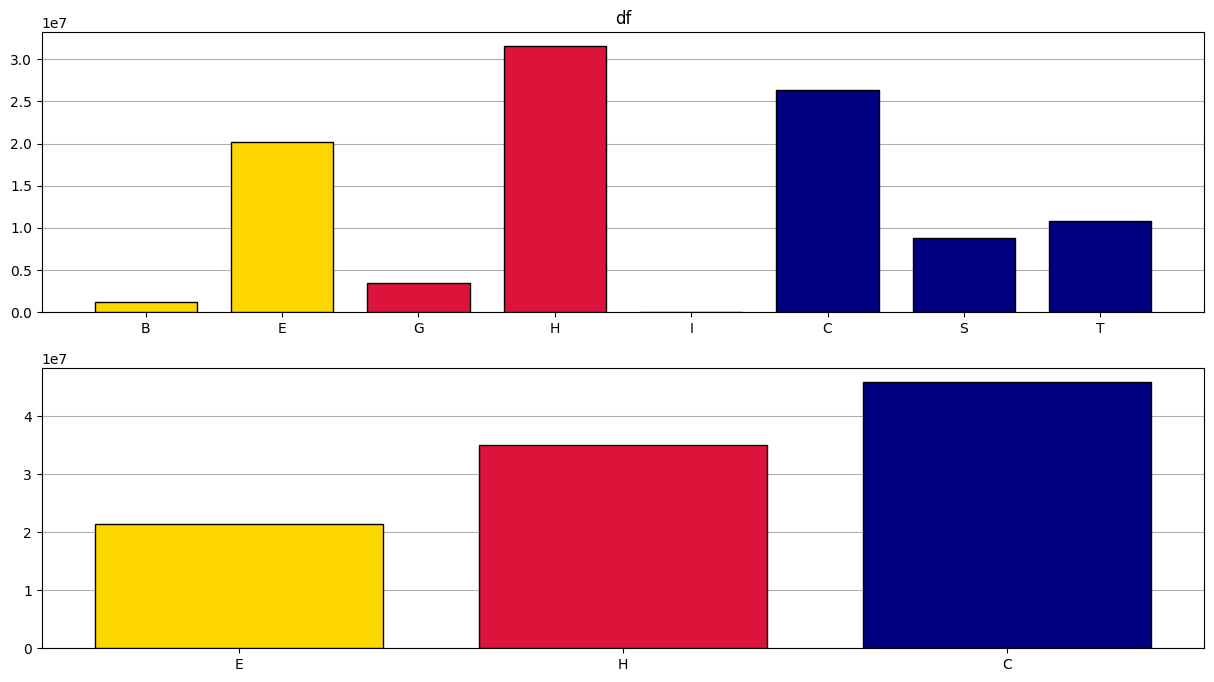

In [ ]:
from collections import defaultdict
# Configures storage for the DataFrame df
SS_counts = {'df': {'SST-8': defaultdict(lambda: 0), 'SST-3': defaultdict(lambda: 0)}}

# Counts the types for the DataFrame df
for seq in df['sst8']:
    for ss in set(seq):
        SS_counts['df']['SST-8'][ss] += seq.count(ss)

for seq in df['sst3']:
    for ss in set(seq):
        SS_counts['df']['SST-3'][ss] += seq.count(ss)

# Sets the order for ss types
ss8_types = ['B', 'E', 'G', 'H', 'I', 'C', 'S', 'T']
ss3_types = ['E', 'H', 'C']

sst8_colors = ['gold', 'gold', 'crimson', 'crimson', 'crimson', 'navy', 'navy', 'navy']
sst3_colors = ['gold', 'crimson', 'navy']

fig, axs = plt.subplots(2, 1, sharey = 'row', figsize = (15, 8))

axs[0].bar(range(8), height = [SS_counts['df']['SST-8'][ss] for ss in ss8_types],
          tick_label = ss8_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst8_colors)
axs[0].grid(axis = 'y', which = 'both', zorder = 0)
axs[0].title.set_text('df')

axs[1].bar(range(3), height = [SS_counts['df']['SST-3'][ss] for ss in ss3_types],
          tick_label = ss3_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst3_colors)
axs[1].grid(axis = 'y', which = 'both', zorder = 0)

fig.show() # Exibe a figura

In [ ]:
AA_counts = {'df': defaultdict(lambda: 0)}
for (seq, nonstd) in zip(df['seq'], df['has_nonstd_aa']):
    if not nonstd:
        for aa in set(seq):
            if aa != '*':
                AA_counts['df'][aa] += seq.count(aa)

# Order the amino acids by decreasing total abundance
total_aa = [AA_counts['df'][aa] for aa in AA_counts['df'].keys()]
temp = sorted(total_aa, reverse=True)
order = [total_aa.index(v) for v in temp]
aa_order = [list(AA_counts['df'].keys())[i] for i in order]

# Shows the proportion of each amino acid in a table
tbl_data = {'Amino Acid': aa_order,
            'df': [ round(AA_counts['df'][aa] / sum(AA_counts['df'].values()), 3) for aa in aa_order]}
pd.DataFrame(tbl_data)

,Amino Acid,df
0,L,0.090
1,A,0.080
2,G,0.074
3,V,0.070
4,E,0.066
5,S,0.063
6,K,0.059
7,D,0.056
8,I,0.056
9,T,0.056


<ipython-input-7-dc164e9afda5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='has_nonstd_aa', data=df, palette='pastel')


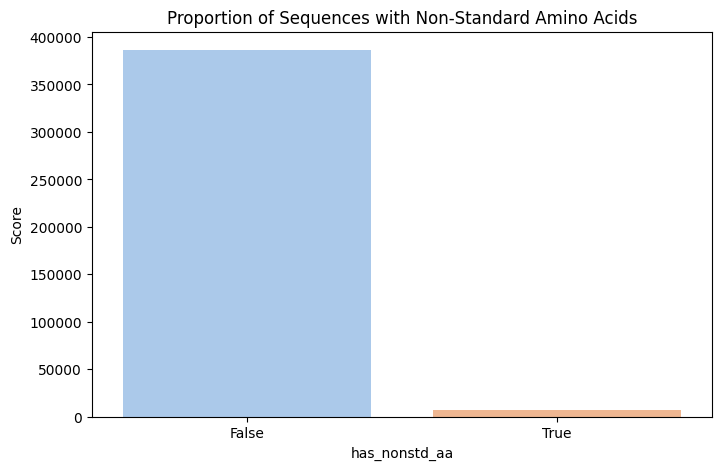

In [ ]:
#Visualization of the proportion of sequences with non-standard amino acids
plt.figure(figsize=(8, 5))
sns.countplot(x='has_nonstd_aa', data=df, palette='pastel')
plt.title('Proportion of Sequences with Non-Standard Amino Acids')
plt.xlabel('has_nonstd_aa')
plt.ylabel('Score')
plt.show()

<ipython-input-8-66df7c512892>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_nonstd_aa', y='len', data=df, palette='pastel')


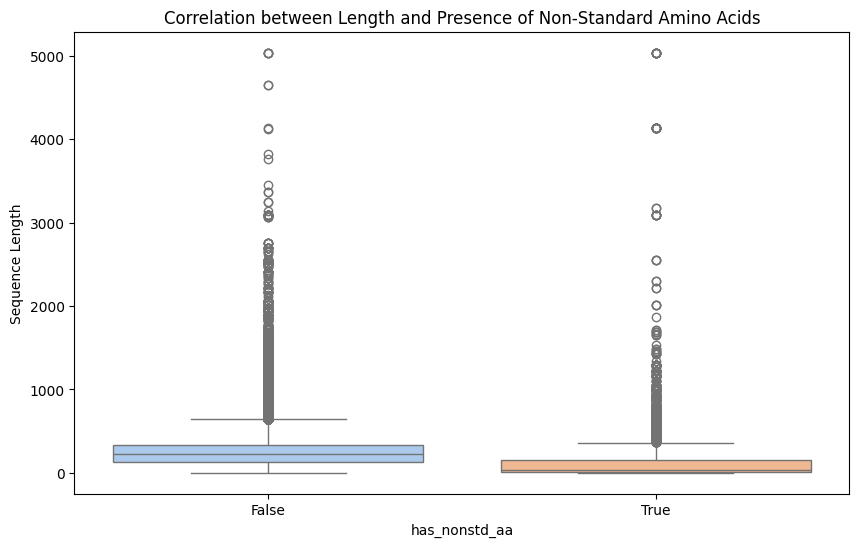

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_nonstd_aa', y='len', data=df, palette='pastel')
plt.title('Correlation between Length and Presence of Non-Standard Amino Acids')
plt.xlabel('has_nonstd_aa')
plt.ylabel('Sequence Length')
plt.show()

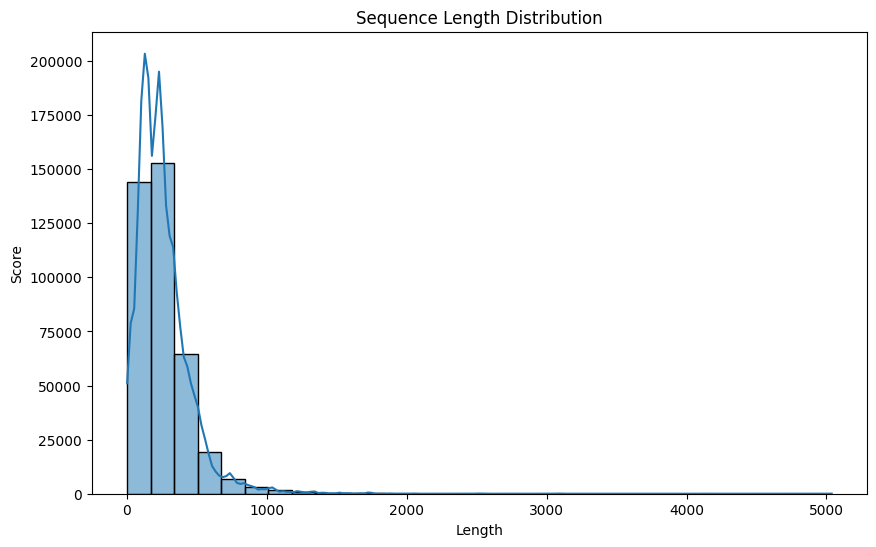

In [ ]:
# Visualization of sequence length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['len'], bins=30, kde=True)
plt.title('Sequence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Score')
plt.show()

dict_a:  {'C': 2987202, 'H': 3879174, 'E': 1316352}
dict_f:  {'C': 1376651, 'H': 1413603, 'E': 1198403}
dict_p:  {'C': 3477788, 'H': 841721, 'E': 432939}
dict_s:  {'C': 3575886, 'H': 1707737, 'E': 1158266}


Text(0.5, 1.0, 'Secondary Structure character counts for aminoacid S')

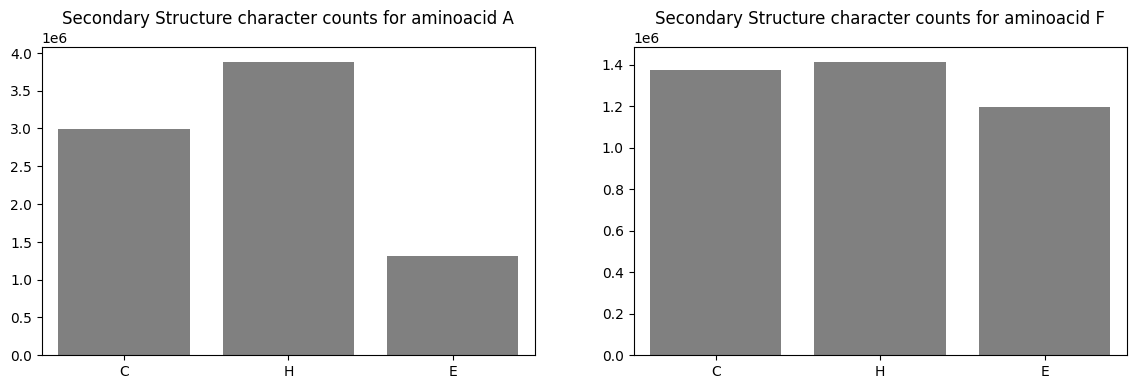

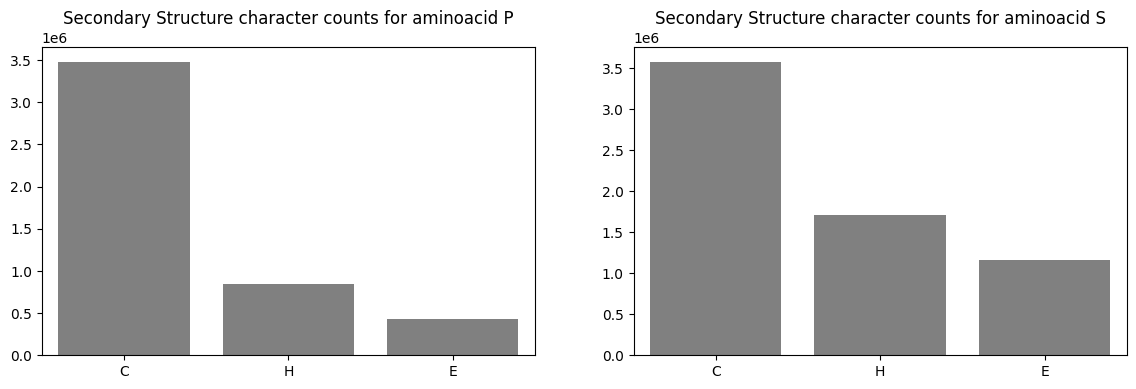

In [ ]:
dict_a = {'C': [], 'H': [], 'E': []}
dict_f = {'C': [], 'H': [], 'E': []}
dict_p = {'C': [], 'H': [], 'E': []}
dict_s = {'C': [], 'H': [], 'E': []}

for se, sst in zip(df['seq'], df['sst3']):
    for s, ss in zip(se, sst):
        if s == 'A':
            if ss == 'C':
                dict_a['C'].append(1)
            elif ss == 'H':
                dict_a['H'].append(1)
            elif ss == 'E':
                dict_a['E'].append(1)
        elif s == 'F':
            if ss == 'C':
                dict_f['C'].append(1)
            elif ss == 'H':
                dict_f['H'].append(1)
            elif ss == 'E':
                dict_f['E'].append(1)
        elif s == 'P':
            if ss == 'C':
                dict_p['C'].append(1)
            elif ss == 'H':
                dict_p['H'].append(1)
            elif ss == 'E':
                dict_p['E'].append(1)
        elif s == 'S':
            if ss == 'C':
                dict_s['C'].append(1)
            elif ss == 'H':
                dict_s['H'].append(1)
            elif ss == 'E':
                dict_s['E'].append(1)

for k in dict_a.keys():
    dict_a[k] = sum(dict_a[k])
for k in dict_f.keys():
    dict_f[k] = sum(dict_f[k])
for k in dict_p.keys():
    dict_p[k] = sum(dict_p[k])
for k in dict_s.keys():
    dict_s[k] = sum(dict_s[k])

print('dict_a: ', dict_a)
print('dict_f: ', dict_f)
print('dict_p: ', dict_p)
print('dict_s: ', dict_s)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=list(dict_a.keys()), y=list(dict_a.values()), color='gray')
plt.title('Secondary Structure character counts for aminoacid A')
plt.subplot(1, 2, 2)
sns.barplot(x=list(dict_f.keys()), y=list(dict_f.values()), color='gray')
plt.title('Secondary Structure character counts for aminoacid F')

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=list(dict_p.keys()), y=list(dict_p.values()), color='gray')
plt.title('Secondary Structure character counts for aminoacid P')
plt.subplot(1, 2, 2)
sns.barplot(x=list(dict_s.keys()), y=list(dict_s.values()), color='gray')
plt.title('Secondary Structure character counts for aminoacid S')


In [ ]:
#Sequence with majority length
length_values= df['len']
length_counts = length_values.value_counts()
print("Sequence Length      Counts:")
print(length_counts)

Sequence Length      Counts:
231     3457
99      3041
129     2922
146     2185
156     1879
        ... 
1722       1
1279       1
1002       1
1301       1
1370       1
Name: len, Length: 1366, dtype: int64


# Pre-Processing

In [ ]:
df.drop_duplicates(subset='seq', inplace=True)

# Define the function to clear rows with asterisks and remove asterisks from 'seq' column
def clear_asterisks(df, seqs_column_name, pct=30):
    indices = []
    for i, seq in enumerate(df[seqs_column_name]):
        if (seq.count('*') * 100 / len(seq)) <= pct:
            indices.append(i)
            # Remove asterisks from the sequence
            df.at[i, seqs_column_name] = seq.replace('*', '')
    return df.iloc[indices]

# Use the function to drop rows with asterisks and remove asterisks from 'seq' column
df = clear_asterisks(df, 'seq')

# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95721 entries, 0 to 15846
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pdb_id         92273 non-null  object 
 1   chain_code     92273 non-null  object 
 2   seq            95721 non-null  object 
 3   sst8           92273 non-null  object 
 4   sst3           92273 non-null  object 
 5   len            92273 non-null  float64
 6   has_nonstd_aa  92273 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.8+ MB


In [ ]:
#Drop unnecessary column
df.drop_duplicates(subset='seq',inplace=True)
df.head()

def clear_asterisks (df, seqs_colum_name, pct=30):
  indices = []
  for i, seq in enumerate(df[seqs_colum_name ]):
    if (seq.count ('*')*100/len(seq)) <= pct: indices.append(i)
  return df.iloc[indices]

df = clear_asterisks(df, 'seq')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9078 entries, 0 to 9077
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pdb_id         9078 non-null   object 
 1   chain_code     9078 non-null   object 
 2   seq            9078 non-null   object 
 3   sst8           9078 non-null   object 
 4   sst3           9078 non-null   object 
 5   len            9078 non-null   int64  
 6   has_nonstd_aa  9078 non-null   bool   
 7   Exptl.         9078 non-null   object 
 8   resolution     9078 non-null   float64
 9   R-factor       9078 non-null   float64
 10  FreeRvalue     9078 non-null   float64
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 789.0+ KB


In [ ]:
# Define functions for data preprocessing and loading
def preprocess_data(data, max_sequence_length, num_classes):
    X = []
    y = []
    for sequence, label in data:

        encoded_sequence = np.zeros((max_sequence_length, 20))
        for i, amino_acid in enumerate(sequence):
            if i >= max_sequence_length:
                break
            encoded_sequence[i, amino_acid] = 1
        X.append(encoded_sequence)

        encoded_label = np.zeros((max_sequence_length, num_classes))
        for i, secondary_structure in enumerate(label):
            if i >= max_sequence_length:
                break
            encoded_label[i, secondary_structure] = 1
        y.append(encoded_label)

    X = np.array(X)
    y = np.array(y)

    return X, y

In [4]:
import numpy as np
import pickle

def seq2ngrams(seqs, n=3, maxlen=None, padding_value=''):
    ngrams_list = []

    if maxlen is None:
        maxlen = max(len(seq) for seq in seqs)
        print("Max length Seq:",maxlen)

    for seq in seqs:
        padded_seq = seq + padding_value * (maxlen - len(seq))

        seq_ngrams = []

        for i in range(len(padded_seq) - n + 1):
            ngram = padded_seq[i:i+n]
            seq_ngrams.append(ngram)

        ngrams_list.append(seq_ngrams)

    return np.array(ngrams_list,dtype="object")

maxlen_seq = 250
input_seqs, target_seqs = df[['seq', 'sst3']][(df.len <= maxlen_seq) & (~df.has_nonstd_aa)].values.T
input_grams = seq2ngrams(input_seqs)
print(len(input_grams))

Max length Seq: 250
220722


In [5]:
import pickle
from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

maxlen_seq = 250

# Tokenization and padding for input data
tokenizer_encoder = Tokenizer()
tokenizer_encoder.fit_on_texts(input_grams)
input_data = sequence.pad_sequences(
    tokenizer_encoder.texts_to_sequences(input_grams),
    maxlen=maxlen_seq,
    padding='post'
)
X = input_data

# Tokenization and padding for target data
tokenizer_decoder = Tokenizer(char_level=True)
tokenizer_decoder.fit_on_texts(target_seqs)
target_data = sequence.pad_sequences(
    tokenizer_decoder.texts_to_sequences(target_seqs),
    maxlen=maxlen_seq,
    padding='post'
)
target_data = to_categorical(target_data, num_classes=len(tokenizer_decoder.word_index) + 1)
y = target_data

In [6]:
input_data.shape, target_data.shape

((220722, 250), (220722, 250, 4))

In [ ]:
import numpy as np

class TCN:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.Wxf = np.random.randn(hidden_size, input_size)
        self.Wxi = np.random.randn(hidden_size, input_size)
        self.Wxo = np.random.randn(hidden_size, input_size)
        self.Wxc = np.random.randn(hidden_size, input_size)

        self.Whf = np.random.randn(hidden_size, hidden_size)
        self.Whi = np.random.randn(hidden_size, hidden_size)
        self.Who = np.random.randn(hidden_size, hidden_size)
        self.Whc = np.random.randn(hidden_size, hidden_size)

        self.bf = np.random.randn(hidden_size, 1)
        self.bi = np.random.randn(hidden_size, 1)
        self.bo = np.random.randn(hidden_size, 1)
        self.bc = np.random.randn(hidden_size, 1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, xt, ht_minus_1, ct_minus_1):
        ft = self.sigmoid(np.dot(self.Wxf, xt) + np.dot(self.Whf, ht_minus_1) + self.bf)
        it = self.sigmoid(np.dot(self.Wxi, xt) + np.dot(self.Whi, ht_minus_1) + self.bi)
        ot = self.sigmoid(np.dot(self.Wxo, xt) + np.dot(self.Who, ht_minus_1) + self.bo)
        ct = ft * ct_minus_1 + it * self.tanh(np.dot(self.Wxc, xt) + np.dot(self.Whc, ht_minus_1) + self.bc)
        ht = ot * self.tanh(ct)
        return ht, ct

input_size = 10
hidden_size = 8
tcn_unit = TCN(input_size, hidden_size)

xt = np.random.randn(input_size, 1)
ht_minus_1 = np.random.randn(hidden_size, 1)
ct_minus_1 = np.random.randn(hidden_size, 1)

ht, ct = tcn_unit.forward(xt, ht_minus_1, ct_minus_1)
print("Output hidden state (ht):", ht)

Output hidden state (ht): [[-0.13888322]
 [ 0.17524158]
 [-0.0018023 ]
 [ 0.15319724]
 [ 0.61868813]
 [-0.0164688 ]
 [ 0.06945014]
 [-0.24890105]]


# BiTCN

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Split and Train data

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import KFold
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout
from sklearn.model_selection import KFold
import numpy as np

# Define grid of hyperparameters
lstm_layers = [1, 2]
units_per_layer = [32, 64, 128]
dropout_rates = [0.1, 0.2, 0.3]
batch_sizes = [8, 16, 32, 64]
epochs = [30, 60, 100]
learning_rates = [0.001, 0.01, 0.1]

best_accuracy = 0
best_hyperparameters = {}

In [ ]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
for lstm_layer in lstm_layers:
  for units in units_per_layer:
    for dropout_rate in dropout_rates:
      for batch_size in batch_sizes:
        for epoch in epochs:
          for learning_rate in learning_rates:
            accuracies = []
            for train_index, val_index in kf.split(X):
                X_train_fold, X_val_fold = X[train_index], X[val_index]
                y_train_fold, y_val_fold = y[train_index], y[val_index]

                model = Sequential()
                model.add(Embedding(input_dim=n_words, output_dim=128, input_length=maxlen_seq))
                for _ in range(lstm_layer):
                    model.add(Bidirectional(LSTM(units=units, return_sequences=True)))
                    model.add(Dropout(dropout_rate))
                model.add(Dense(n_tags, activation='softmax'))
                model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

                model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
                _, accuracy = model.evaluate(X_val_fold, y_val_fold)
                accuracies.append(accuracy)
                avg_accuracy = np.mean(accuracies)
                print(f"Average validation accuracy for {lstm_layer} LSTM layer(s), {units} units per layer, dropout rate {dropout_rate}, batch size {batch_size}, epochs {epoch}, learning rate {learning_rate}: {avg_accuracy}")

                if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_hyperparameters = {'lstm_layers': lstm_layer, 'units_per_layer': units, 'dropout_rate': dropout_rate, 'batch_size': batch_size, 'epochs': epoch, 'learning_rate': learning_rate}

print("Best hyperparameters:", best_hyperparameters)

# Model training

In [7]:
!pip install keras-tcn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.3 MB/s eta 0:00:00


In [17]:
import pickle
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Bidirectional, Conv1D, MaxPooling1D, Flatten, Concatenate, Reshape
from tcn import TCN
from keras.layers import Lambda
from keras import backend as K

# Maxlen_seq
maxlen_seq = 250

n_words = len(tokenizer_encoder.word_index) + 1
n_tags = len(tokenizer_decoder.word_index) + 1
print(n_words, n_tags)

# Input layers
input_layer = Input(shape=(maxlen_seq,))
embedding_layer = Embedding(input_dim=n_words, output_dim=128, input_length=maxlen_seq)(input_layer)
bi_lstm_layer = Bidirectional(LSTM(units=64, return_sequences=True, recurrent_dropout=0.1))(embedding_layer)

# Softmax layer
softmax_layer = TimeDistributed(Dense(n_tags, activation="softmax"))(bi_lstm_layer)

# Fully connected layer
fc_layer = Dense(64, activation='relu')(bi_lstm_layer)

# 1D convolutional block
conv1d_layer = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(bi_lstm_layer)
pooling_layer = MaxPooling1D(pool_size=2)(conv1d_layer)
flatten_layer = Flatten()(pooling_layer)

# Reverse layer
reverse_layer = Lambda(lambda x: K.reverse(x, axes=1))(bi_lstm_layer)
reverse_layer = LSTM(units=64, return_sequences=True)(reverse_layer)

# Forward TCN
forward_tcn_layer = TCN(return_sequences=True)(bi_lstm_layer)

# Backward TCN
backward_tcn_layer = TCN(return_sequences=True, go_backwards=True)(bi_lstm_layer)

# Reshaping layers to have the same shape along the batch size axis
flatten_layer = Reshape((maxlen_seq, -1))(flatten_layer)
reverse_layer = Reshape((maxlen_seq, -1))(reverse_layer)

# Concatenate all layers
concatenated_layers = Concatenate()([softmax_layer, fc_layer, flatten_layer, reverse_layer, forward_tcn_layer, backward_tcn_layer])

# Fully connected layer after concatenation
final_fc_layer = Dense(64, activation='relu')(concatenated_layers)

# Output layer
output_layer = TimeDistributed(Dense(n_tags, activation="softmax"))(final_fc_layer)

# Model
model = Model(input_layer, output_layer)

model.summary()


def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", q3_acc])

X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=.4, random_state=0)
seq_train, seq_test, target_train, target_test = train_test_split(input_seqs, target_seqs, test_size=.4, random_state=0)

8001 4
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 250)]                0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 250, 128)             1024128   ['input_4[0][0]']             
                                                                                                  
 bidirectional_3 (Bidirecti  (None, 250, 128)             98816     ['embedding_3[0][0]']         
 onal)                                                                                            
                                                                                                  
 conv1d_3 (Conv1D)           (None, 250, 64)              24640     ['bidirectional_3

In [ ]:
# import pickle
# from tcn import TCN
# from keras.models import Model
# from sklearn.model_selection import train_test_split
# from keras.metrics import categorical_accuracy
# from keras import backend  as K
# import tensorflow as tf

# from keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Bidirectional

# maxlen_seq = 500

# n_words = len(tokenizer_encoder.word_index) + 1
# n_tags = len(tokenizer_decoder.word_index) + 1
# print(n_words, n_tags)

# input_layer = Input(shape=(maxlen_seq,))
# x = Embedding(input_dim=n_words, output_dim=128, input_length=maxlen_seq)(input_layer)
# x = Bidirectional(TCN(return_sequences=True))(x)
# y = TimeDistributed(Dense(n_tags, activation="softmax"))(x)
# model = Model(input_layer, y)
# model.summary()

# def q3_acc(y_true, y_pred):
#     y = tf.argmax(y_true, axis=-1)
#     y_ = tf.argmax(y_pred, axis=-1)
#     mask = tf.greater(y, 0)
#     return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", q3_acc])

# X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=.4, random_state=0)
# seq_train, seq_test, target_train, target_test = train_test_split(input_seqs, target_seqs, test_size=.4, random_state=0)

7620 4
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 500, 128)          975360    
                                                                 
 bidirectional_6 (Bidirecti  (None, 500, 128)          337536    
 onal)                                                           
                                                                 
 time_distributed_6 (TimeDi  (None, 500, 4)            516       
 stributed)                                                      
                                                                 
Total params: 1313412 (5.01 MB)
Trainable params: 1313412 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from sklearn.model_selection import train_test_split
from keras.metrics import categorical_accuracy
from keras import backend  as K
import tensorflow as tf
from keras.optimizers import Adam


def q3_accuracy(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

# learning_rate = 0.001

# optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy", q3_accuracy])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# seq_train, seq_test, target_train, target_test = train_test_split(input_seqs, target_seqs,  test_size=.4, random_state=42)

In [ ]:
!pip install scikeras

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, TimeDistributed, Dense
from keras.optimizers import Adam

# Define a function to create the model
def create_model(optimizer='adam'):
    input_layer = Input(shape=(maxlen_seq,))
    embedding_layer = Embedding(input_dim=n_words, output_dim=256, input_length=maxlen_seq)(input_layer)
    bi_lstm_layer = Bidirectional(LSTM(units=128, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))(embedding_layer)
    dropout_layer = Dropout(0.5)(bi_lstm_layer)
    output_layer = TimeDistributed(Dense(n_tags, activation="softmax"))(dropout_layer)
    model = Model(input_layer, output_layer)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [32,64,128],
    'epochs': [30, 60, 100]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.875000 using {'batch_size': 32, 'epochs': 30, 'optimizer': 'adam'}
0.875000 (0.039353) with: {'batch_size': 32, 'epochs': 30, 'optimizer': 'adam'}
0.863889 (0.046916) with: {'batch_size': 32, 'epochs': 30, 'optimizer': 'rmsprop'}
0.856481 (0.045300) with: {'batch_size': 32, 'epochs': 60, 'optimizer': 'adam'}
0.857407 (0.036541) with: {'batch_size': 32, 'epochs': 60, 'optimizer': 'rmsprop'}
0.843519 (0.042322) with: {'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}
0.844444 (0.031207) with: {'batch_size': 32, 'epochs': 100, 'optimizer': 'rmsprop'}
0.861111 (0.034401) with: {'batch_size': 64, 'epochs': 30, 'optimizer': 'adam'}
0.860185 (0.040676) with: {'batch_size': 64, 'epochs': 30, 'optimizer': 'rmsprop'}
0.861111 (0.037903) with: {'batch_size': 64, 'epochs': 60, 'optimizer': 'adam'}
0.857407 (0.045300) with: {'batch_size': 64, 'epochs': 60, 'optimizer': 'rmsprop'}
0.848148 (0.032883) with: {'batch_size': 64, 'epochs': 100, 'optimizer': 'adam'}
0.844444 (0.034037) with: {

In [ ]:
import os
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import CSVLogger

checkpoint_dir = "/content/drive/MyDrive/psp/checkpoint2/adam"
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, "cp-{epoch:04d}.ckpt")

early_stopping = EarlyStopping(monitor='accuracy', patience=3, min_delta=0.001)

csv_logger = CSVLogger('/content/drive/MyDrive/psp/checkpoint2/training.log', separator=',', append=False)

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_freq='epoch',
    period=10,
)

history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 60,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping,checkpoint_callback,csv_logger],
    verbose=1
)

Epoch 1/60
40/40 [==============================] - 34s 705ms/step - loss: 0.6041 - accuracy: 0.7095 - q3_acc: 0.3681 - val_loss: 0.5110 - val_accuracy: 0.7430 - val_q3_acc: 0.4090
Epoch 2/60
40/40 [==============================] - 7s 169ms/step - loss: 0.4702 - accuracy: 0.7472 - q3_acc: 0.4192 - val_loss: 0.4610 - val_accuracy: 0.7531 - val_q3_acc: 0.4322
Epoch 3/60
40/40 [==============================] - 6s 158ms/step - loss: 0.4584 - accuracy: 0.7527 - q3_acc: 0.4317 - val_loss: 0.4523 - val_accuracy: 0.7546 - val_q3_acc: 0.4355
Epoch 4/60
40/40 [==============================] - 7s 165ms/step - loss: 0.4447 - accuracy: 0.7710 - q3_acc: 0.4738 - val_loss: 0.4563 - val_accuracy: 0.7670 - val_q3_acc: 0.4641
Epoch 5/60
40/40 [==============================] - 6s 157ms/step - loss: 0.4190 - accuracy: 0.7969 - q3_acc: 0.5333 - val_loss: 0.4023 - val_accuracy: 0.8131 - val_q3_acc: 0.5701
Epoch 6/60
40/40 [==============================] - 7s 167ms/step - loss: 0.3904 - accuracy: 0.8197

# Evaluate model

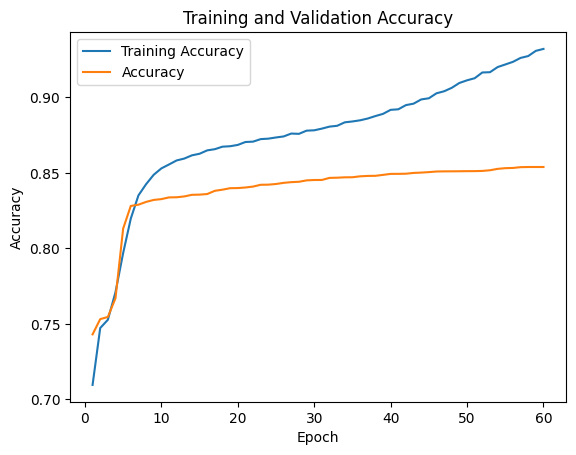

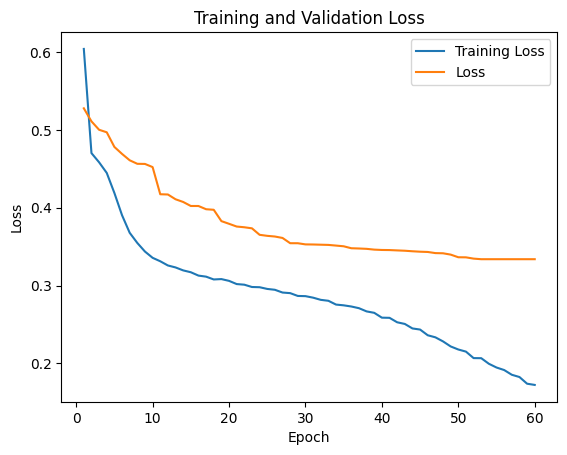

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
evals = model.evaluate(X_test,y_test)
print('accuracy:',evals[1])

106/106 [==============================] - 59s 560ms/step - loss: 0.1738 - accuracy: 0.9309 - q3_acc: 0.8412
accuracy: 0.9309234882354736


In [23]:
from keras import backend as K
import tensorflow as tf

def q3_acc(y_true, y_pred):
  y = tf.argmax(y_true, axis=-1)
  y_= tf.argmax(y_pred, axis = -1)
  mask = tf.greater(y,0)
  q3 = K.cast(K.equal(tf.boolean_mask(y, mask),tf.boolean_mask(y_,mask)),K.floatx())
  return sum(q3) / q3.shape[0]

preds = model.predict(X_test)
print(q3_acc(y_test,preds))

106/106 [==============================] - 35s 316ms/step
tf.Tensor(0.8412174, shape=(), dtype=float32)


1/1 [==============================] - 0s 83ms/step
training
---
Input: ASNQVTLAFANDAEISAFGFCTASEAVSYYSEAAASGFMQCRFVSFDLADTVEGLLPEDYVMVVVGTTKLSAYVDTFGSRPRNICGWLLFSNCNYFLEELELTFGRRGGLEHHHHHHH
Target: CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCEEEECEECCCCCCECCEEEECCEEEEEEEECCCCCEEEEEEEECCCCHHHHHHCCCCCCCCEEEEEECCCCHHHHCCCCCCCCCCCCCCCCCCC
Result: CCCCCCCCCCCHCCCCCCCCCCCCCCCCCCCCCCCEEEECEECCCCCCECCEEEECCEEEEEEEECCCCCEEEHEEEECCHCHHHHHHCCCCCCCCEEEEEECCCCHHHHHCCCCCCCCCCCCCCCCCC


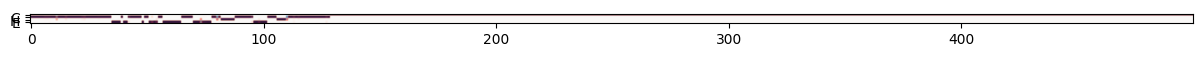

---
Input: GSHMRSRRVDVMDVMNRLILAMDLMNRDDALRVTGEVREYIDTVKIGYPLVLSEGMDIIAEFRKRFGCRIIADFKVADIPETNEKICRATFKAGADAIIVHGFPGADSVRACLNVAEEMGREVFLLTEMSHPGAEMFIQGAADEIARMGVDLGVKNYVGPSTRPERLSRLREIIGQDSFLISPGVGAQGGDPGETLRFADAIIVGRSIYLADNPAAAAAGIIESIKDLRIPEDPAANKARKEAELAAATAEQ
Target: CEEEECCCCCCHHHHHHCCCCCCCCCCCEEECCEEEEEEEECCEEEEEEEEEEECCEEEEEECCCHHHHHHHHHHHHHHHCCCCCHHHHHHHHCCHHHHHHHHHCCCCCCCCCCCCCHHHHHHHHHHCCCCCHHHHHHHHHHHHHHHCCEEEECCEEEECCCCHHHHHHHHHHHHHHCCCCHHHHHHHHHHHCCCCHHHHHHCCHHHHHHHHHCCCCCCHHHHHHHHHHCCCCCCCCCCCHHHHHHHHHHHCCCCCCCHHHHHHHHHHHCHHHHHHHHHHHHHHHHHCCCCCCCC
Result: CEEEECCCCCCHHHHHHHCCCCCCCCCCEEECCEEEEEEEECCEEEEEEEEEEECCEEEEEECCCHHHHHHHHHHHHHHHCCCCCHHHHHHHHCCHHHHHHHHHCCCCCCCCCCCCCHHHHHHHHHHCCCCCHHHHHHHHHHHHHHHCCEEEECCEEEECCCCHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHCCCHHHHHHCCHHHHHHHHHCCCCCCHHHHHHHHHHCCCCCCCCCCCHHHHHHHHHHHCCCCCCCHHHHHHHHHHHCHHHHHHHHHHHHHHHHHCCCCCCCC


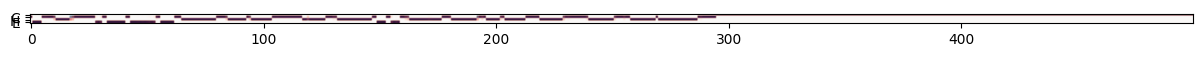

---
Input: MVDEHKAHKAILAYEKGWLAFSLAMLFVFIALIAYTLATHTAGVIPAGKLERVDPTTVRQEGPWADPAQAVVQTGPNQYTVYVLAFAFGYQPNPIEVPQGAEIVFKITSPDVIHGFHVEGTNINVEVLPGEVSTVRYTFKRPGEYRIICNQYCGLGHQNMFGTIVVKE
Target: CCHHHCCEEEECCECCCECHHHHHHHHCHHHHHHHCCCCCHHHHHHHHHHHHHHHCCCCCCCCHHHHHHHHHHHHHHHCCCCCCHHHHHHHHCHHHHCCECCCHHHHHHHHHHHCEEEEEECCCHHHHHHHHCCCCCCCCEEEEHHHHCCCCCCHHHHHHHHHHHHHCCCCHHHEEEEECCCCCCHHHHHHHCCEEEEECCCCCCCCCCCCCCCCCCCCCCEEECCHHHHHHHHHHHHHC
Result: CCHHHCCEEEECCECCCECHHHHHHHHCHHHHHHHCCCCCHHHHHHHHHHHHHHHCCCCCCCCHHHHHHHHHHHHHHHHCCCCCHHHHHHHHCHHHCCCECCCHHHHHHHHHHHCEEEEEECCCHHHHHHHHHHCCCCCCEEEEHHHHCCCCCCHHHHHHHHHHHHHCCCCHHHEEEEECCCCCCHHHHHHHCCHEEEEECCCCCCCCCCCCCCCCCCCCCEEECCHHHHHHHHHHHHHC


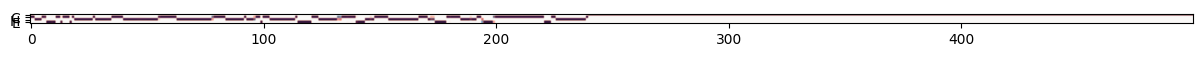

testing
---
Input: GMDDLTNLAARLRLLEDREEIRELIARYGPLADSGDAEALSELWVEDGEYAVVGFATAKGRAAIAALIDGQTHRALMADGCAHFLGPATVTVEGDTATARCHSVVFRCVSGTFGSHRVSANRWTFRRTPAGWRAVRRENALLDGSAAARALLQFR
Target: CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHCCEEEEEEEEECCCCCEECHHHHHHHHHCHHHHHHHHHCEEEEECCCEEEEECCEEEEEEEEEEEEEECCEEEEEEEEEEEEEEEEECCEEEEEEEEEEECCCCHHHHHHHCCC
Result: CCCCCCCHHHHHHHHHCHHHHHHHHHHHCHEEHCHHHHHHHHHHCCCCCEEHEHEEHHHCHEHEHCCCHCHCCHHHECCCEEEEECCCEEECECCEEECCEEEEEEEEEEEEHCCCEEEEEEEEEEEECCCHEHHHEHHHHHCCHHHHHHHHECC


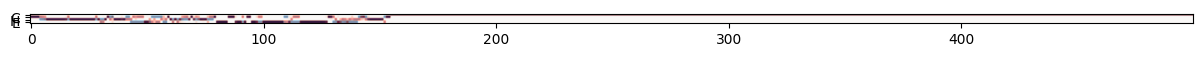

---
Input: MSGIAEFDGILDSLEHSKTGISGSKILKLTNLSMENVSENAQFVASVYKYAKRAPVTHKLGALYILDSIVRSFQDGAKKNNESFENPVDASFSGGWCKAAEITDSLVADAIQHAPSAHLPKILKLCDIWEKASTFPPEKLESLRSKLKDAMALEHHHHHHHH
Target: CCCHHHHHHHHHHHHHCCCCCCHHHHHHHHHHHHHCHHHHHHHHHHHHHHHHHCCHHHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHCCHHHHHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHHCCCCCCCCCCCC
Result: CCCCCCCCCCECCCCCCCCCCCHHCHEEEEECCCCCHCHHHHCHHHHHHHHHHHCCCHHEEEEEEHCHHHHHHCHHCHHCHCEHECCCCHCCCCCHHHHHHHHHHHHHHHHHHHHCCCCHCHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHHCCCCCCCCCC


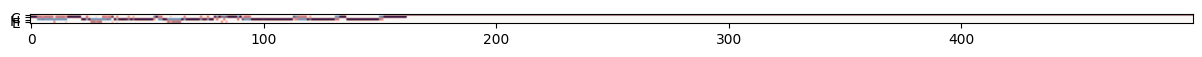

---
Input: GSSINWPPEFHPGVPWKGLQNI
Target: CCCCCCCCCCCCCCCCCCCCCC
Result: CCCCCCCCCCCCCCCCCCCCCC


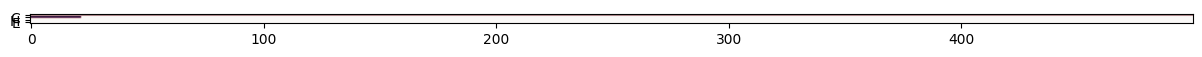

In [ ]:
#Viewing Result
def n_gram_to_sequence(oh_seq, index):
    s = ''
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            break
    return s

def plot_results(x, y, y_):
    print("---")
    print("Input: " + str(x))
    print("Target: " + str(n_gram_to_sequence(y, revsere_decoder_index).upper()))
    print("Result: " + str(n_gram_to_sequence(y_, revsere_decoder_index).upper()))
    fig = plt.figure(figsize=(15,50))
    plt.imshow(y.T, cmap='Blues')
    plt.imshow(y_.T, cmap='Reds', alpha=.5)
    plt.yticks(range(4), [' '] + [revsere_decoder_index[i+1].upper() for i in range(3)])
    plt.show()

revsere_decoder_index = {value:key for key,value in tokenizer_decoder.word_index.items()}
revsere_encoder_index = {value:key for key,value in tokenizer_encoder.word_index.items()}

N=3
y_train_pred = model.predict(X_train[:N])
y_test_pred = model.predict(X_test[:N])

print('training')
for i in range(N):
    plot_results(seq_train[i], y_train[i], y_train_pred[i])
print('testing')
for i in range(N):
    plot_results(seq_test[i], y_test[i], y_test_pred[i])